In [1]:
!pip3 install torch

    100% |████████████████████████████████| 591.8MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60eb4000 @  0x7ffa63ed32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [17]:
  n_pts = 100
  centers = [[-0.5, 0.5], [0.5, -0.5]]
  X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
  
  x_data = torch.Tensor(X)
  print(y)
  y_data = torch.Tensor(y.reshape(100, 1))

  print(y.shape)

[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0]
(100,)


In [18]:
def scatter_plot():
  # takes the first column, where y is 0 - x's
  # then takes the first column, where y is 1 - y's
  plt.scatter(X[y==0, 0], X[y==0, 1])
  # The same but for the second blob
  plt.scatter(X[y==1, 0], X[y==1, 1])
  plt.show()

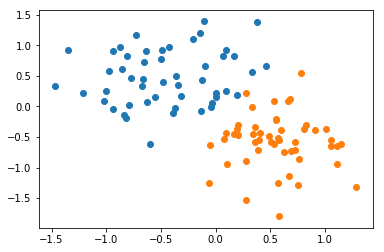

In [19]:
scatter_plot()


In [20]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [52]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [53]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [54]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

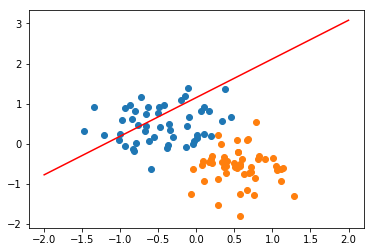

In [55]:
plot_fit('Initial Model')

In [56]:
criterion = nn.BCELoss() #binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [61]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.25603345036506653
epoch: 1 loss: 0.25591474771499634
epoch: 2 loss: 0.25579628348350525
epoch: 3 loss: 0.2556779086589813
epoch: 4 loss: 0.2555598318576813
epoch: 5 loss: 0.2554418444633484
epoch: 6 loss: 0.2553239166736603
epoch: 7 loss: 0.25520628690719604
epoch: 8 loss: 0.25508877635002136
epoch: 9 loss: 0.2549714148044586
epoch: 10 loss: 0.2548541724681854
epoch: 11 loss: 0.25473710894584656
epoch: 12 loss: 0.25462016463279724
epoch: 13 loss: 0.25450342893600464
epoch: 14 loss: 0.2543868124485016
epoch: 15 loss: 0.2542703151702881
epoch: 16 loss: 0.25415414571762085
epoch: 17 loss: 0.2540379464626312
epoch: 18 loss: 0.2539219856262207
epoch: 19 loss: 0.25380605459213257
epoch: 20 loss: 0.25369033217430115
epoch: 21 loss: 0.25357481837272644
epoch: 22 loss: 0.2534595727920532
epoch: 23 loss: 0.25334417819976807
epoch: 24 loss: 0.25322917103767395
epoch: 25 loss: 0.253114253282547
epoch: 26 loss: 0.25299951434135437
epoch: 27 loss: 0.2528848350048065
epoch: 28 loss: 

epoch: 403 loss: 0.2182157337665558
epoch: 404 loss: 0.21814142167568207
epoch: 405 loss: 0.21806715428829193
epoch: 406 loss: 0.2179928719997406
epoch: 407 loss: 0.21791885793209076
epoch: 408 loss: 0.2178446650505066
epoch: 409 loss: 0.21777066588401794
epoch: 410 loss: 0.21769675612449646
epoch: 411 loss: 0.21762293577194214
epoch: 412 loss: 0.2175491899251938
epoch: 413 loss: 0.21747547388076782
epoch: 414 loss: 0.21740184724330902
epoch: 415 loss: 0.2173282653093338
epoch: 416 loss: 0.21725477278232574
epoch: 417 loss: 0.21718142926692963
epoch: 418 loss: 0.2171081006526947
epoch: 419 loss: 0.2170347273349762
epoch: 420 loss: 0.2169615775346756
epoch: 421 loss: 0.21688856184482574
epoch: 422 loss: 0.21681547164916992
epoch: 423 loss: 0.21674253046512604
epoch: 424 loss: 0.21666960418224335
epoch: 425 loss: 0.2165968120098114
epoch: 426 loss: 0.21652406454086304
epoch: 427 loss: 0.21645137667655945
epoch: 428 loss: 0.2163788229227066
epoch: 429 loss: 0.21630628407001495
epoch: 430 

epoch: 694 loss: 0.1993226259946823
epoch: 695 loss: 0.1992659568786621
epoch: 696 loss: 0.1992093324661255
epoch: 697 loss: 0.19915269315242767
epoch: 698 loss: 0.19909611344337463
epoch: 699 loss: 0.19903965294361115
epoch: 700 loss: 0.19898317754268646
epoch: 701 loss: 0.19892673194408417
epoch: 702 loss: 0.19887040555477142
epoch: 703 loss: 0.19881413877010345
epoch: 704 loss: 0.1987578421831131
epoch: 705 loss: 0.1987016499042511
epoch: 706 loss: 0.1986454427242279
epoch: 707 loss: 0.19858936965465546
epoch: 708 loss: 0.19853326678276062
epoch: 709 loss: 0.19847725331783295
epoch: 710 loss: 0.19842126965522766
epoch: 711 loss: 0.19836536049842834
epoch: 712 loss: 0.19830942153930664
epoch: 713 loss: 0.19825369119644165
epoch: 714 loss: 0.19819779694080353
epoch: 715 loss: 0.19814209640026093
epoch: 716 loss: 0.1980864703655243
epoch: 717 loss: 0.1980307549238205
epoch: 718 loss: 0.19797520339488983
epoch: 719 loss: 0.19791969656944275
epoch: 720 loss: 0.1978641152381897
epoch: 721

In [66]:
plt.clf()
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

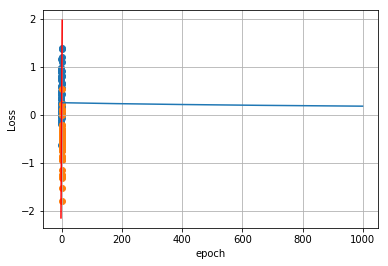

In [67]:
plot_fit("Trained Model")


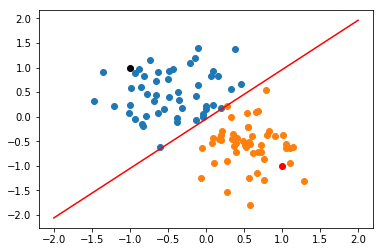

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Black point belongs in class = 0


In [60]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 